In [1]:
import json
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


In [2]:
with open('../newest_ts', 'r') as f:
    ts = f.read()

data_path = f"../data/data_{ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

In [3]:
def ts2dt(ts, format='%Y-%m-%d %H:%M:%S'):
    return (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    .astimezone(tz.tzlocal())
                    .strftime(format))

print(f"Recent query happens at {ts2dt(ts)}")

Recent query happens at 2021-08-23 03:16:25


In [4]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly', 'daily'])

In [5]:
data['current']

{'dt': 1629688585,
 'sunrise': 1629669780,
 'sunset': 1629715720,
 'temp': 32.24,
 'feels_like': 39.24,
 'pressure': 1008,
 'humidity': 69,
 'dew_point': 25.82,
 'uvi': 10.47,
 'clouds': 25,
 'visibility': 10000,
 'wind_speed': 3.79,
 'wind_deg': 218,
 'wind_gust': 4.5,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}]}

In [6]:
data['hourly'][0]

{'dt': 1629687600,
 'temp': 32.24,
 'feels_like': 39.24,
 'pressure': 1008,
 'humidity': 69,
 'dew_point': 25.82,
 'uvi': 10.47,
 'clouds': 25,
 'visibility': 10000,
 'wind_speed': 3.79,
 'wind_deg': 218,
 'wind_gust': 4.5,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'pop': 0.5}

In [7]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

In [8]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629687600,32.24,39.24,1008,69,25.82,10.47,25,10000,3.79,218,4.50,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.50,NaN
1,1629691200,31.90,38.90,1008,69,25.50,12.06,25,10000,4.66,219,4.81,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.49,NaN
2,1629694800,31.55,38.55,1008,69,25.17,11.88,31,10000,4.48,219,4.48,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.41,NaN
3,1629698400,31.17,37.45,1007,68,24.56,9.88,41,10000,4.33,207,4.33,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.46,{'1h': 0.27}
4,1629702000,30.74,36.35,1006,68,24.15,6.78,85,10000,4.00,201,4.19,"[{'id': 804, 'main': 'Clouds', 'description': ...",0.05,NaN


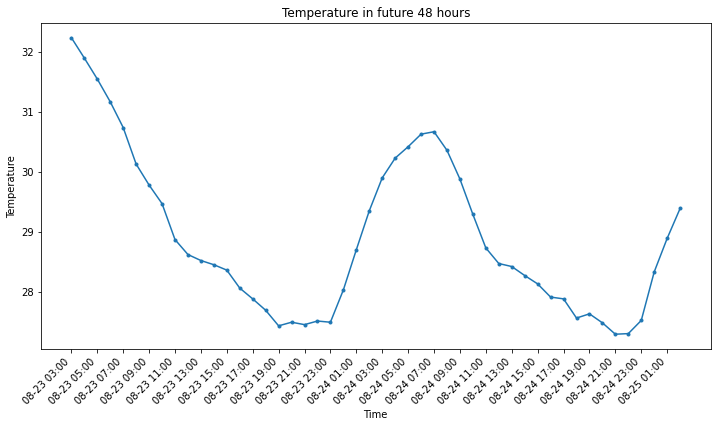

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M') for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
plt.show()